In [ ]:
# 最基本的幾個套件，基本上一定要import
import numpy as np
import tensorflow as tf
from tensorflow import keras

# 跟「繪圖」有關的套件，如果沒有打算繪圖就不用 import
%matplotlib inline
import matplotlib.pyplot as plt

# 跟「Preprocess」有關的套件，如果沒有要訓練模型的話就不用 import
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 跟「設計模型」有關的套件，如果沒有要設計或是修改模型的話就不用 import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D

# 跟「編譯(compile)模型」有關的套件
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

# 跟「混淆矩陣(confusion matrix)」有關的套件
from sklearn.metrics import confusion_matrix
import itertools

# 跟「MNIST資料庫」有關的套件，如果要換其他的資料庫，把"mnist"換成其他資料庫的名字 
# 其他資料庫有：cifar10, cifar100, imdb, reuters...等，未來若要練習其他機器學習技巧可以玩玩看！
from tensorflow.keras.datasets import mnist 



In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(" Number of GPUs available: " , len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

 Number of GPUs available:  1


In [ ]:
def show_train_history(train_history):

  fig , ax = plt.subplots()
  fig.subplots_adjust(hspace=0.4, wspace=0.4) #設定子圖的間隔
  fig.set_figwidth(14)

  ax1 = plt.subplot(1, 2, 1)
  plt.title("Accuracy")
  plt.plot(train_history.history['accuracy'],'-', label='accuracy')
  plt.plot(train_history.history['val_accuracy'],'-',  label='val_accuracy')
  leg = ax1.legend(loc='lower right') 
  plt.ylabel('accuracy')
  plt.xlabel('Epoch')


  ax2 = plt.subplot(1, 2, 2)
  plt.title("Loss")
  plt.plot(train_history.history['loss'],'-', label='loss')
  plt.plot(train_history.history['val_loss'],'-', label='val_loss')
  leg = ax2.legend(loc='upper right') 
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.show()

In [ ]:
def view_image(image_data, title1, title2=None):
  if title2 is None:
    num = min(len(image_data), len(title1), 9)
  else:
    num = min(len(image_data), len(title1), len(title2), 9)
  plt.figure(figsize=(14,14))
  for i in range(num):
    plt.subplot(3, 3, i+1)
    plt.imshow(image_data[i])
    plt.colorbar(orientation='vertical')
    if title2 is None:
      plt.title(str(title1[i]))
    else:
      plt.title(str(title1[i]) + ' | ' + str(title2[i]))

In [ ]:
def plot_confusion_matrix( test_labels, results, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
  cm = confusion_matrix(test_labels, results)
  plt.figure()
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
# 下載 mnist 資料
(X_TRAIN, Y_TRAIN), (X_TEST, Y_TEST) = mnist.load_data()
# X: 資料本身, Y: 資料的標籤（也就是0,1,2,...,9）
print(X_TRAIN.shape)
print(Y_TRAIN.shape)
print(X_TEST.shape)
print(Y_TEST.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


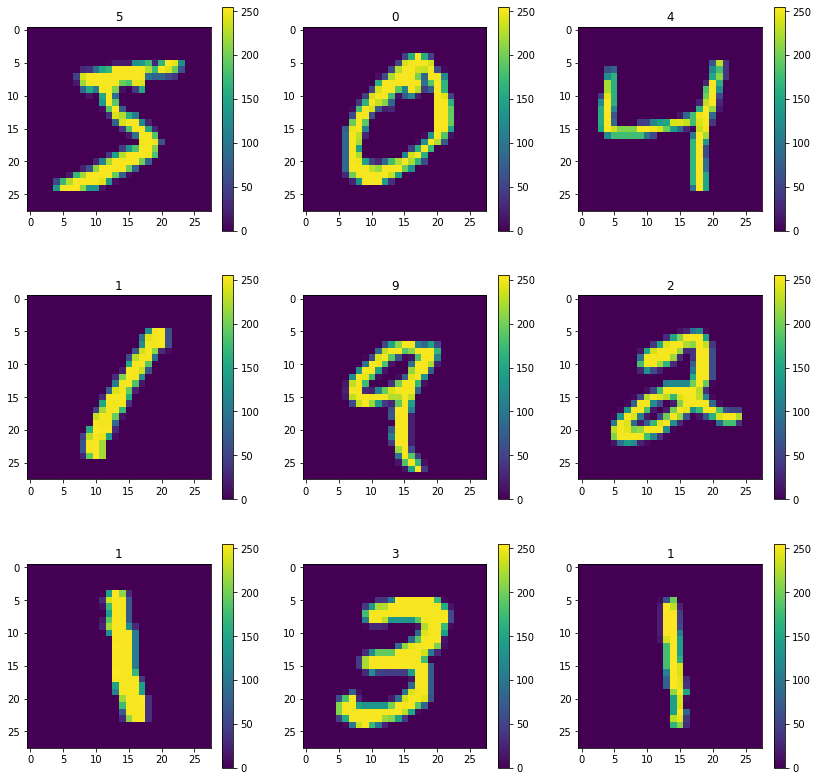

In [ ]:
view_image(image_data=X_TRAIN, title1=Y_TRAIN )

In [ ]:
# add channel

x_train_reshaped = X_TRAIN.reshape(60000,28,28,1)
x_test_reshaped = X_TEST.reshape(10000,28,28,1)

x_train_normalized = x_train_reshaped / 255
x_test_normalized = x_test_reshaped / 255

y_train_onehot = to_categorical(Y_TRAIN)
y_test_onehot = to_categorical(Y_TEST)

print(x_train_normalized.shape)
print(x_test_normalized.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
model = Sequential([
  # TODO1 START

  # TODO1 END
])

In [ ]:
model.summary()

In [ ]:
# 定義訓練方式
# loss function: 交叉熵
# optimizer: Adam
# 評估模型: 準確率
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
train_history = model.fit(x_train_normalized, y_train_onehot, validation_split=0.2, epochs=30, batch_size=300, verbose=1)

In [ ]:
show_train_history(train_history)

In [ ]:
score = model.evaluate(x_test_normalized, y_test_onehot)
print("Accuracy: ", score[1]*100)

In [ ]:
RESULTS = model.predict(x_test_normalized)
RESULTS = np.argmax(RESULTS,axis=1)
plot_confusion_matrix(Y_TEST, RESULTS, [0,1,2,3,4,5,6,7,8,9])

In [ ]:
filter = []
for i in range(len(RESULTS)):
  if RESULTS[i] == Y_TEST[i] :
    filter.append(False)
  else:
    filter.append(True)
    

x_test_incorrect = X_TEST[filter]
y_test_incorrect = Y_TEST[filter]
results_incorrect = RESULTS[filter]

In [ ]:
view_image(x_test_incorrect, y_test_incorrect, results_incorrect)

In [ ]:
import os.path
if os.path.isfile('models/mnist_CNN.h5') is False:
  model.save('models/mnist_CNN.h5')